# Import Required Libraries

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST Dataset

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape and Normalize Data
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)) / 255.0
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)) / 255.0

# Define CNN Model Architecture

In [6]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPool2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compile Model


In [8]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train Model


In [10]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=64
)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.8112 - loss: 0.5913 - val_accuracy: 0.9803 - val_loss: 0.0661
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9686 - loss: 0.1057 - val_accuracy: 0.9872 - val_loss: 0.0451
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9788 - loss: 0.0729 - val_accuracy: 0.9874 - val_loss: 0.0435
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9832 - loss: 0.0563 - val_accuracy: 0.9887 - val_loss: 0.0400
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9860 - loss: 0.0454 - val_accuracy: 0.9891 - val_loss: 0.0412
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9858 - loss: 0.0447 - val_accuracy: 0.9895 - val_loss: 0.0404
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9891 - loss: 0.0346 - val_accuracy: 0.9922 - val_loss: 0.0323
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9908 - loss: 0.0325 - val_acc

# Evaluate Model"

In [12]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9876 - loss: 0.0355
Test Accuracy: 99.10%


# Visualization of Training History

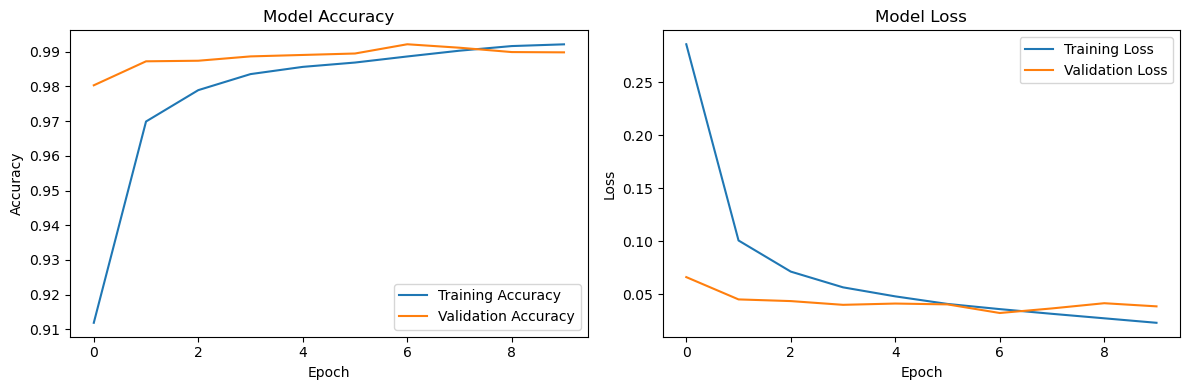

In [24]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()